In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
df=pd.read_csv('updatedResumeDataSet.csv')

In [88]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [89]:
df.shape

(962, 2)

In [90]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [91]:
df.duplicated().sum()
#not remove this because we have No large data

np.int64(796)

<Axes: xlabel='Category'>

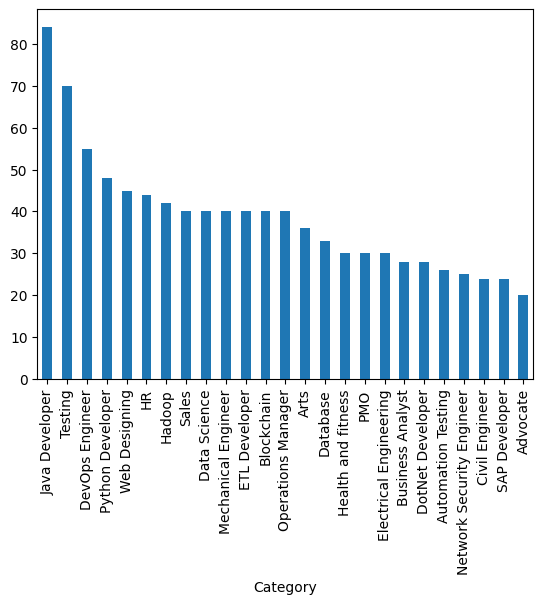

In [92]:
df['Category'].value_counts().plot(kind='bar')

In [93]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

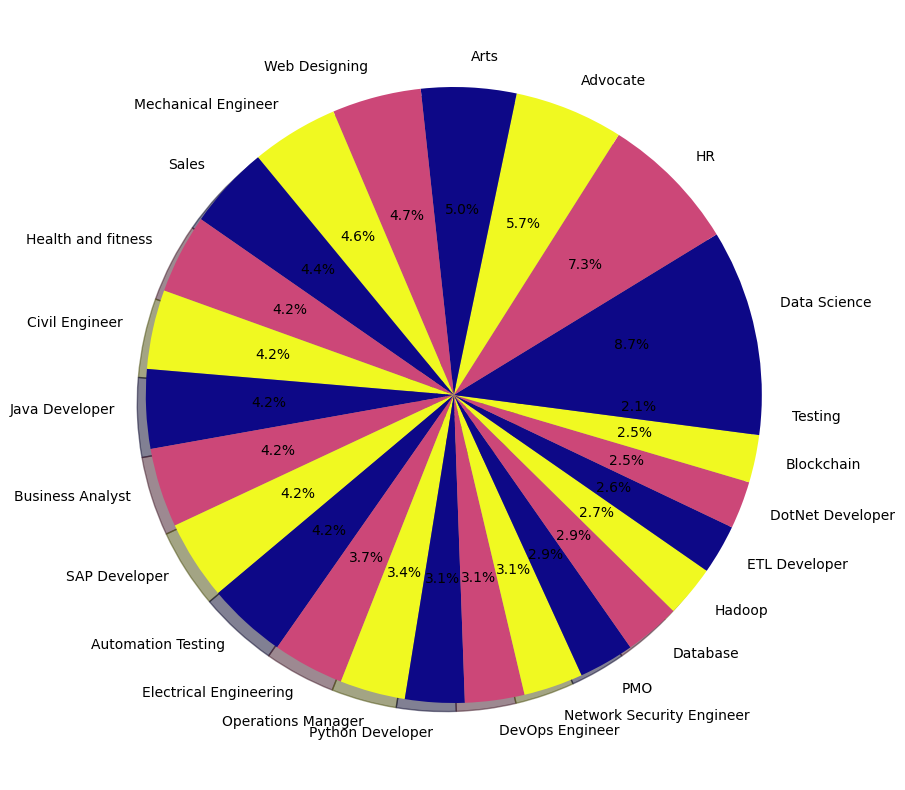

In [94]:
fields=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(fields,labels=labels,autopct="%1.1f%%",shadow=True,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [158]:
#Cleaning Data
# Clean the data
import re
def cleanResume(text):
    text = re.sub('http\S+\s*', ' ', text)
    text = re.sub('RT|cc', ' ', text)
    text = re.sub('#\S+', '', text)
    text = re.sub('@\S+', '  ', text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text = re.sub(r'[^\x00-\x7f]', r' ', text)
    text = re.sub('\s+', ' ', text)
    return text




In [160]:
df['Resume'] = df['Resume'].apply(lambda x:cleanResume(x))

In [161]:
df['Resume'][0]
#here this Resume details is clean 

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [162]:
#categorical to Numerical transform
#plan of attack -----
#1>label_encoder for output column
#2>tf-idf for input(Resume) column


In [163]:
from sklearn.preprocessing import LabelEncoder

In [164]:
le=LabelEncoder()

le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [165]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [166]:

# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

In [167]:
#Vectorization>>tf-idf(term frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
imp_text=tfidf.transform(df['Resume'])

In [168]:
imp_text

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164269 stored elements and shape (962, 7352)>

In [169]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imp_text, df['Category'], test_size=0.2, random_state=42)

In [170]:
X_train.shape

(769, 7352)

In [171]:
X_test.shape

(193, 7352)

In [172]:
#Model training Part
# this is multiclass problem
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9844559585492227


In [173]:
from sklearn.ensemble import RandomForestClassifier
obj2=RandomForestClassifier()
obj2.fit(X_train,y_train)
y_pred1=obj2.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.9948186528497409


In [174]:
import xgboost as xgb
model=xgb.XGBClassifier()
model.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [175]:
y_pred2=model.predict(X_test)

In [176]:
accuracy_score(y_test,y_pred2)

1.0

In [177]:
#Pickle the data
import pickle

In [178]:
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))

In [179]:
#dummy_demo

In [180]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email:singhg81484@gmail.com
Phone: 8955048873
Github: https://GovindSingh072004.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/Govind Singh/
ABOUT ME
WORK EXPERIENCE
SKILLES
Govind SIngh
LANGUAGES
English
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [181]:
demo=pickle.load(open('model.pkl','rb'))
#clean the input resume
cleaned_demo=cleanResume(myresume)
#vectorize
vec=tfidf.transform([cleaned_demo])
predicts=model.predict(vec)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_names=category_mapping.get(predicts,"Unknown")
print("Predicted category-----:",category_names)
print(predicts)

Predicted category-----: Data Science
6
